In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('./data/train.csv')

In [3]:
print(train_data.shape)
print(train_data.info())
train_data.head()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(train_data, title = 'Profile Report')
# profile.to_file('profile_report.html')

### __Target variable analysis__

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

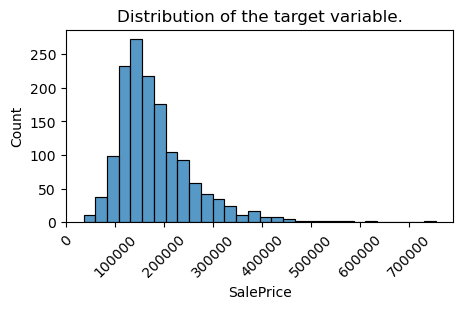

In [6]:
target_data = train_data['SalePrice']

plt.figure(figsize=(5,2.5))
sns.histplot(target_data, bins=30)
plt.title('Distribution of the target variable.')
plt.xticks(rotation = 45)
plt.show()

In [7]:
print(f"The Skewness of the target variable is {train_data['SalePrice'].skew()}")

The Skewness of the target variable is 1.8828757597682129


We will apply a log transformation to correct the skewness and help the model beter predict.

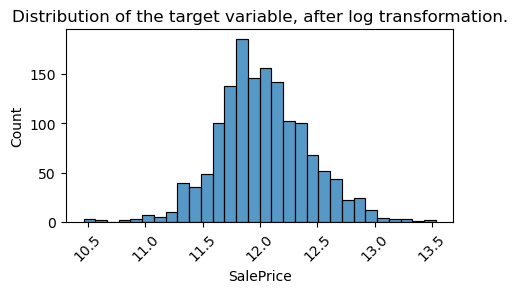

In [8]:
import numpy as np

train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

plt.figure(figsize=(5,2.5))
sns.histplot(train_data['SalePrice'], bins=30)
plt.title('Distribution of the target variable, after log transformation.')
plt.xticks(rotation = 45)
plt.show()

### __Correlation analysis__

In [9]:
import numpy as np

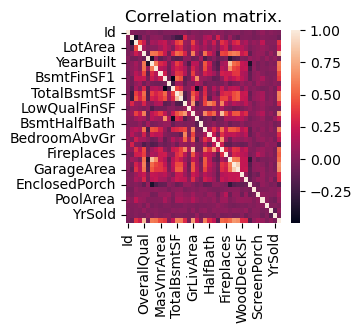

In [10]:
numerical_data = train_data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()

plt.figure(figsize=(2.5,2.5))
sns.heatmap(corr_matrix)
plt.title('Correlation matrix.')
plt.show()

In [11]:
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_target)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### __Missing data__

In [12]:
missing_data = train_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=True)
print(missing_data)

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


### __Preprocessing__

In [13]:
categorical_cols = train_data.select_dtypes(exclude=[np.number]).columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        # ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
pipeline = make_pipeline(
        preprocessor,
        HistGradientBoostingRegressor()
    )

### __Model prediction__

In [14]:
target_name = "SalePrice"
y = train_data[target_name]
X = train_data.drop(columns=target_name)

In [15]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Model fit
pipeline.fit(X_train, y_train)

# Model predict
y_pred = pipeline.predict(X_test)

# Error estimation
from sklearn.metrics import root_mean_squared_error
error = root_mean_squared_error(y_test, y_pred)
print(f'The RMSE is {error}.')

The RMSE is 0.20029791207084316.


### __Output extraction__

In [16]:
test_data = pd.read_csv('./data/test.csv')

# Preprocess the test data using the same pipeline
test_data_preprocessed = pipeline.predict(test_data)

# Make predictions on the test data
predictions = np.exp(test_data_preprocessed)

In [17]:
results = pd.DataFrame(
    dict(
        Id=test_data['Id'],
        SalePrice=predictions,
    )
)
results.to_csv("submission.csv", index=False)